# Acoustic feature extraction 
> Representing sound with numbers

- toc: true 
- badges: true
- comments: true
- categories: [coswara]
- image: images/chart-preview.png
- author: Neeraj Sharma

Before the digital revolution, which started in 1960s, sound was predominantly recorded by etching the pressure waveform on a physical medium. During playback the etched waveform was tracked and converted to vibrations of a diaphragm. This is a beautiful idea, and you will be amazed to know that the quality was very good. To know more try seeing this [video](https://www.youtube.com/watch?v=lzRvSWPZQYk).

In current times, having witnessed the digital revolution, sound signals are stored as discrete sequence of numbers in in physical mediums such semiconductors. This approch is more efficient compared to vinyl records, and hence, have made the capture and playback of sound signals easily accessible. Your mobile phone does it everytime you are talking on phone. When it comes to digital capture of an analogue signal, following needs some understanding,
* **sampling frequency (fs)**: As the name implies, it refers to picking few samples from a continuous-time signal (or waveform). Sampling frequency refers to the number of samples you pick per second, samples being spaced uniformly apart in time. Obviously, you are while you are sampling you are also discarding a lot. Is there a critical sampling frequency when the discarding is not going to hurt you? Yes, and this rate is referred to as the Nyquist-rate. It is equal to the twice the maximum frequency content in the continuous-time signal you are interested to sample. In our case this signal of interest is sound, and a good choice of fs is 48 kHz for music signals and 16 kHz for speech signals. A beautiful illustration of this is provided [here](https://jackschaedler.github.io/circles-sines-signals/sampling.html) and more details [here](http://www.wescottdesign.com/articles/Sampling/sampling.pdf)

* **quantization**: Once we have sampled along time, the next step is to store the amplitude values taken by the signal at the sampled time instants. These ampltude values will be stored in the computer (or more specifically, disk drives) and this storage has a finite resolution for storing a number decided by the number of bits used to represent a number. These bits can be n = 2,4,8, 16, 32, etc. For n bits, the resolution is (1/(2^n-1)). So, more the number of bits, higher is the resolution and hence, the representation (or storage) of the number in the memory of the computer will be more accurate. Sound (or audio) is usually stored at 16-bits. For more details you can read [this](https://en.wikipedia.org/wiki/Quantization_(signal_processing)).

Hurray, a sampled and quantized analogue signal can be stored in any digital media. And once we have stored it, we can also read (or load) it back from the digital media! In step 1, we will attempt reading (or loading) a sound file stored in the github server, and visualize (and hear) the content inside it.


## Loading a sound file

We will load a file 'nMIOAh7qRFf3pqbchclOLKbPDOm1_heavy_cough.wav'. Any WAV file has some metadata stored inside it. This metadata gives information about the sampling frequency, quantization bits, number of channel, etc., used during the capture (and) storage of the sound file. Below we show a screenshot of this information for our file.

![](./my_images/audioFile_metadata.png "Credit: http://coswara.iisc.ac.in/")

We can see that the fs is 16 kHz. Lets now load, listen, and plot the data inside this sound file.

In [57]:
#collapse_show
import numpy as np
import librosa
from IPython.lib.display import Audio
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fs = 16000
fname = 'nMIOAh7qRFf3pqbchclOLKbPDOm1_heavy_cough.wav'
dname = './my_data/'
# load
x, sr = librosa.load(dname+fname,sr=16000)
x = x/max(np.abs(x))
times = np.arange(0,len(x))/fs
# listen
Audio(x, rate=sr, autoplay=False)

On listening using the above widget you would have recognized the sound as repeated coughing. Lets plot the signal.

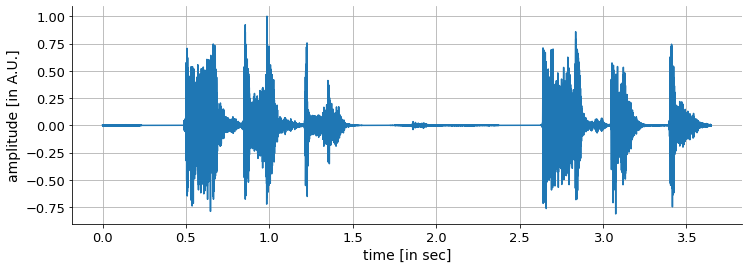

In [58]:
#collapse_show
# plot
fig = plt.subplots(figsize=(12,4))
ax = plt.subplot(1,1,1)
ax.plot(times, x)
ax.grid(True)
plt.ylabel('amplitude [in A.U.]', fontsize=14)
plt.xlabel('time [in sec]', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

The signal starts with a silence, and around 0.5 sec we see the start of the first cough. This is followed by two more, and then a pause which might be an inhaling of air. Subsequently. we see three more coughs. Lets visualiza the distribution of the sample values.

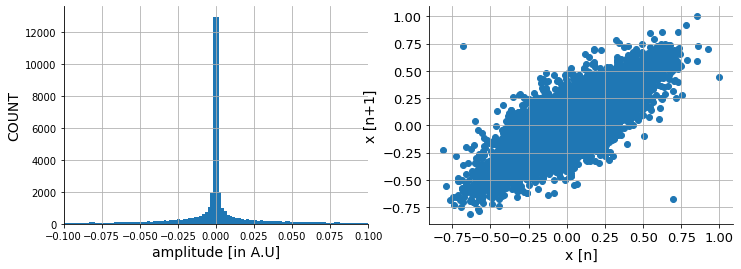

In [59]:
#collapse_show
fig = plt.subplots(figsize=(12,4))
ax = plt.subplot(1,2,1)
ax.hist(x,bins=1000,range=(x.min(), x.max()))
ax.grid(True)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('amplitude [in A.U]', fontsize=14)
# plt.xticks(fontsize=13)
# plt.yticks(fontsize=13)
plt.xlim(-.1,.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1,2,2)
ax.scatter(x[:-1],x[1:])
ax.grid(True)
plt.ylabel('x [n+1]', fontsize=14)
plt.xlabel('x [n]', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

We see that the histogram (shown on the left) peaks around zero. This means most of the sample values are low amplitude (<.0125). We also plot a phase plot of x[n+1] vs x[n] on the right. This lies along y=x indicating a correlation between consecutive time samples. Such high correlation also implies high low frequency (relative to 8 kHz) content in the signal. We will verify this observation using Fourier transform.

A time-domain signal can be analyzed using [Fourier transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/). (To be fair, any signal can be analyzed using Fourier transform). Via a Fourier tranform we can visualize the frequency (or spectral) content in the signal. This is useful for sound signal analysis. The obtained spectral content can help us understand certain perceived attributes of the sound (namely, [timbre](http://hyperphysics.phy-astr.gsu.edu/hbase/Sound/timbre.html)). Lets compute and visualize the spectrum of the above sound signal.

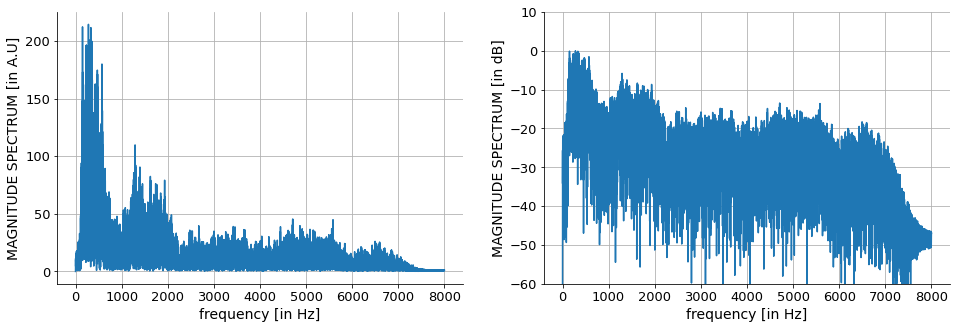

In [60]:
#collapse_show
def nearestpow2(n):
    k=1
    while n>2**k:
        k = k+1
    return 2**k
nfft = nearestpow2(len(x))
X = np.fft.rfft(x,nfft)
freq = np.arange(0,nfft/2+1)/nfft*fs

#collapse_show
fig = plt.subplots(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.plot(freq,np.abs(X))
ax.grid(True)
plt.ylabel('MAGNITUDE SPECTRUM [in A.U]', fontsize=14)
plt.xlabel('frequency [in Hz]', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(1,2,2)
ax.plot(freq,20*np.log10(np.abs(X))-np.max(20*np.log10(np.abs(X))))
ax.grid(True)
plt.ylabel('MAGNITUDE SPECTRUM [in dB]', fontsize=14)
plt.xlabel('frequency [in Hz]', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-60,10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


The plot on the left depicts the spectrum distributed from 0 to 8 kHz (=fs/2). We see a peak (like of a mountain) around 300 Hz, and a second peak around 1500 Hz, follwed by three more peaks. Also, there is a roll-off of the spectral amplitude from lower to higher frequencies. To decreases the contrast between the too high peak and other smaller peaks we can apply a dB transformation to the spectrum amplitude. The resulting plot is shown on the right. Applying dB transform for visualizing the spectral content also makes sense from perception aspects (you might have noticed sound pressure is reported in dBs).
